In [27]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('X_test.csv')

In [29]:
print("Shape of dataset")
print("X Train: {}\ny Train: {}\nX Test: {}".format(x_train.shape, y_train.shape, x_test.shape))

Shape of dataset
X Train: (487680, 13)
y Train: (3810, 3)
X Test: (488448, 13)


In [66]:
print(y_train.sample(5))

      series_id  group_id   surface
3602       3602        43      wood
484         484         1     tiled
1834       1834        60    carpet
3533       3533        46      wood
2540       2540        39  concrete


In [31]:
x_train.head() 

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [32]:
x_test.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,0.91208,-0.38193,-0.050618,0.14028,-0.060205,0.071286,-0.18787,0.29492,2.8027,-9.6816
1,0_1,0,1,0.91220,-0.38165,-0.050573,0.14028,-0.033486,0.060210,-0.18206,0.14944,2.5408,-9.8521
2,0_2,0,2,0.91228,-0.38143,-0.050586,0.14032,-0.029686,0.029476,-0.18441,-0.49741,2.5853,-9.3835
3,0_3,0,3,0.91237,-0.38121,-0.050588,0.14035,-0.024217,0.037788,-0.18783,-0.32376,2.9966,-8.7415
4,0_4,0,4,0.91247,-0.38096,-0.050546,0.14042,-0.038047,0.083405,-0.20170,-0.70103,2.6498,-8.8432


In [33]:
x_train.dtypes

row_id                    object
series_id                  int64
measurement_number         int64
orientation_X            float64
orientation_Y            float64
orientation_Z            float64
orientation_W            float64
angular_velocity_X       float64
angular_velocity_Y       float64
angular_velocity_Z       float64
linear_acceleration_X    float64
linear_acceleration_Y    float64
linear_acceleration_Z    float64
dtype: object

In [67]:
y_train.dtypes

series_id     int64
group_id      int64
surface      object
dtype: object

### OBSERVATIONS: 

#### X_train and X_test datasets have the following entries:
- <b> series and measurements identifiers </b> : row_id, series_id, measurement_number: these identify uniquely a series and measurement; there are 3809 series, each with max 127 measurements
- <b> measurement orientations </b>: orientation_X, orientation_Y, orientation_Z, orientation_W
- <b> angular velocities </b> : angular_velocity_X, angular_velocity_Y, angular_velocity_Z
- <b> linear accelerations </b> : linear_acceleration_X, linear_acceleration_Y, linear_acceleration_Z

#### y_train has the following columns:
- <b> series_id </b> - this corresponds to the series in train data
- <b>group_id</b>
- <b>surface</b> - this is the surface type that need to be predicted

### Checking for missing values : 

In [34]:
print(x_train.isnull().sum())

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64


In [35]:
print(x_test.isnull().sum())

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64


In [36]:
print(y_train.isnull().sum())

series_id    0
group_id     0
surface      0
dtype: int64


#### observation: no missing values in dataset

In [37]:
x_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [38]:
x_test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


In [68]:
y_train.describe(include='object')

,surface
count,3810
unique,9
top,concrete
freq,779


#### Observation:
There is the same number of series in X_train and y_train, numbered from 0 to 3809 (total 3810). Each series have 128 measurements.
Each series in train dataset is part of a group (numbered from 0 to 72, 72 being the half of 128).
The number of rows in X_train and X_test differs with 6 x 128, 128 being the number of measurements for each group.

### Distribution of target variable:

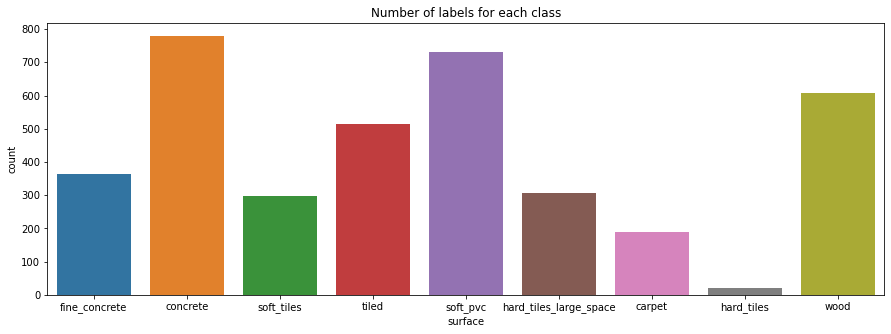

In [40]:
import warnings
warnings.filterwarnings('ignore')
f, ax = plt.subplots(1,1, figsize=(15,5))
graph = sns.countplot(y_train['surface'])
graph.set_title("Number of labels for each class")
plt.show()    

### Distribution of Train(red) and Test(green) features:

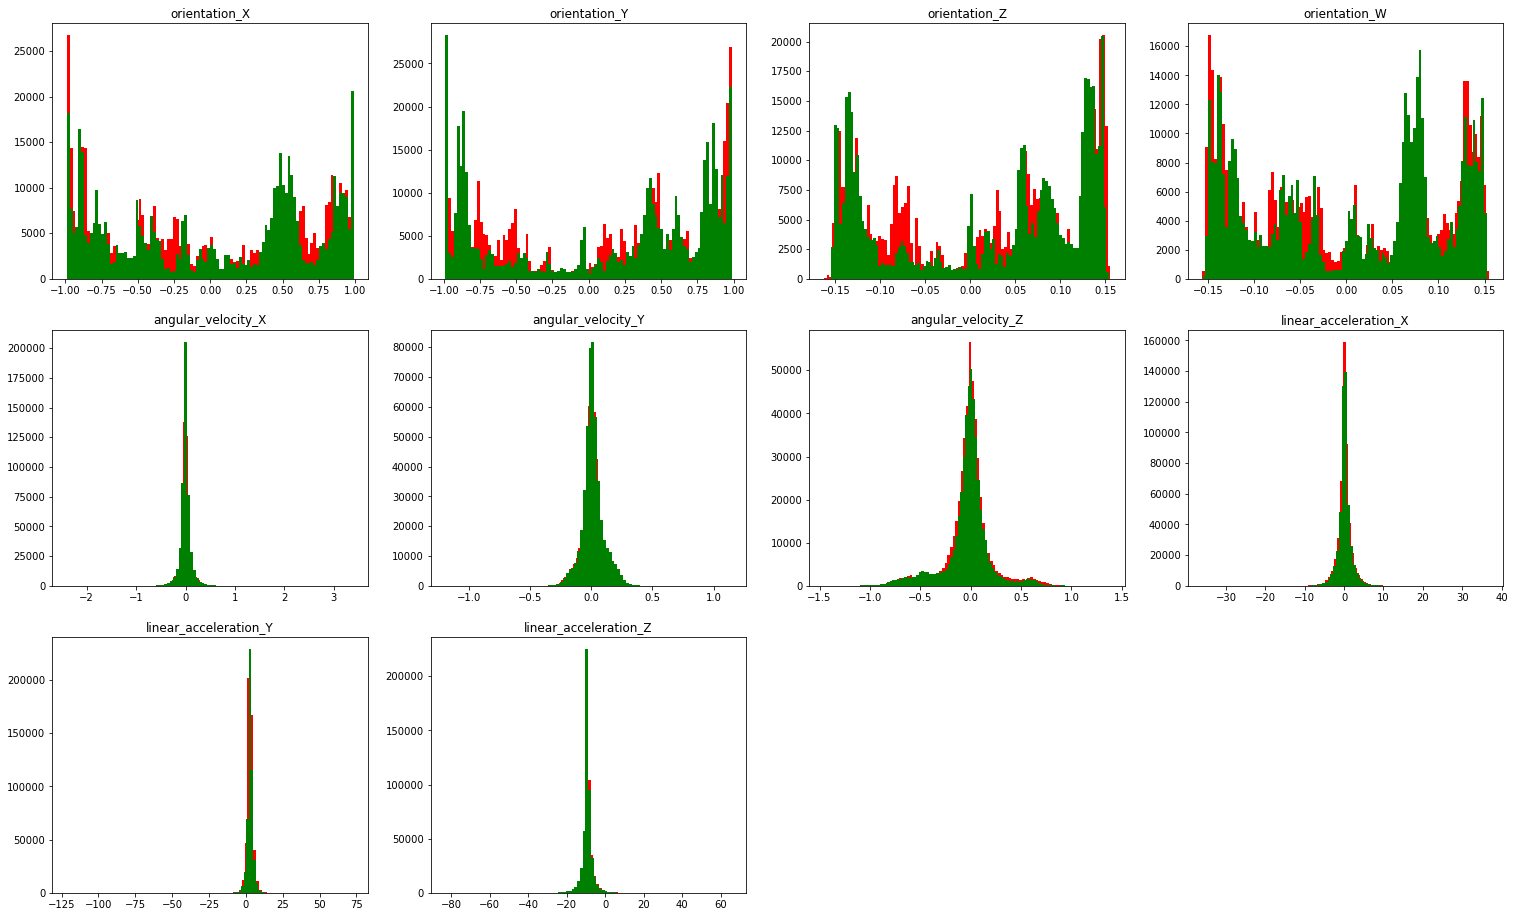

In [41]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(x_train.columns[3:]):
    plt.subplot(3, 4, i+1)
    plt.hist(x_train[col], color='red', bins=100)
    plt.hist(x_test[col], color='green', bins=100)
    plt.title(col)

#### Observations: 
- Velocity and acceleration have normal distribution
- Feature distributions in train and test are quite similar.

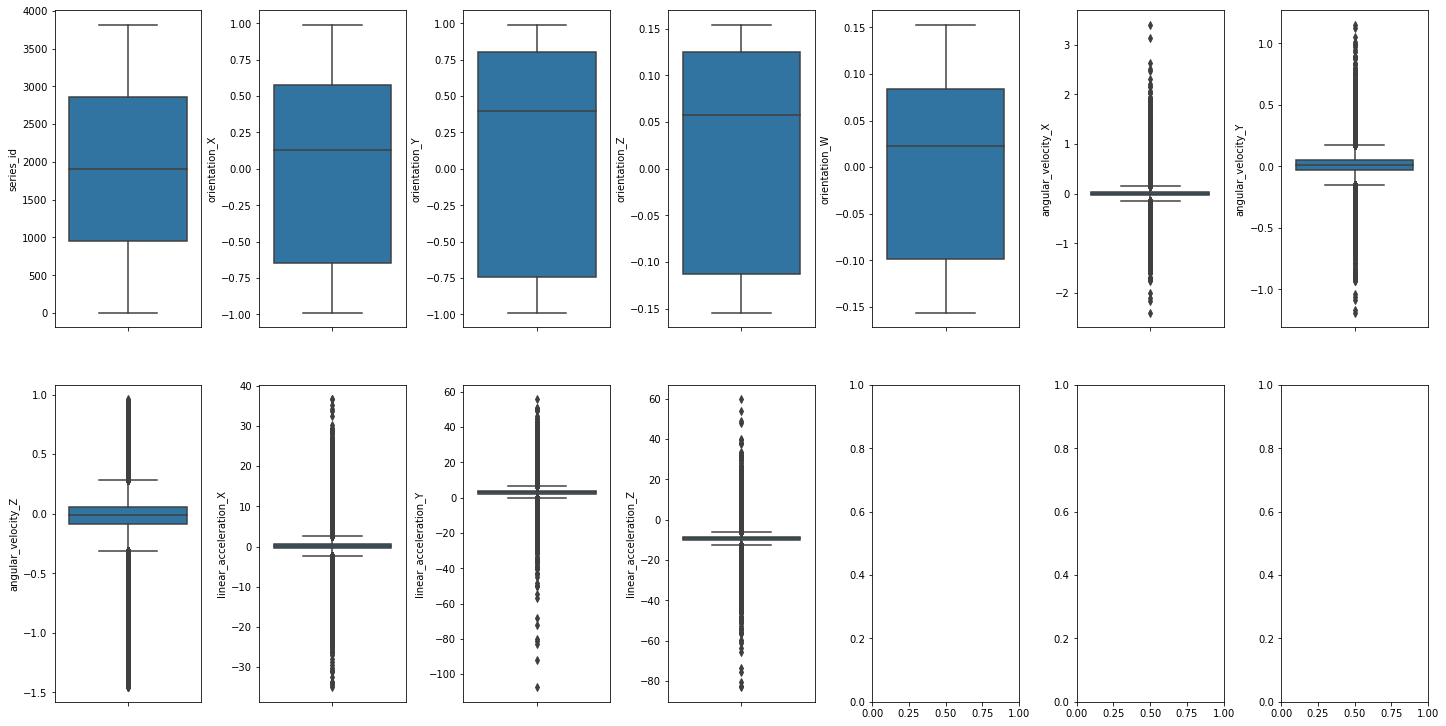

In [71]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in x_test.items():
 sns.boxplot(y=k, data=x_test, ax=axs[index])
 index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Correlation heatmaps: 

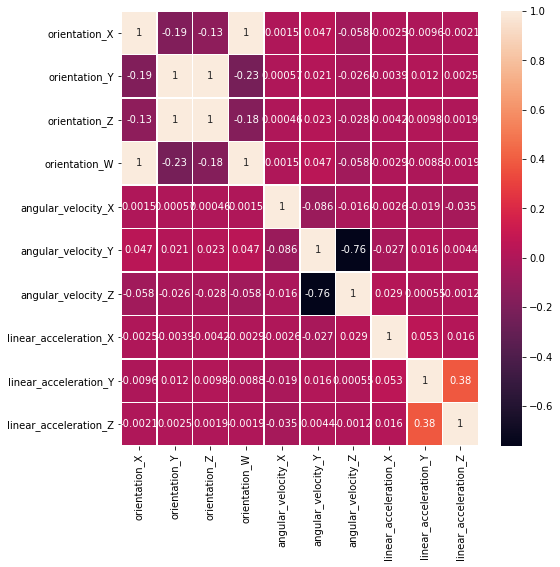

In [42]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x_train.iloc[:,3:].corr(), annot=True, linewidths=.5)

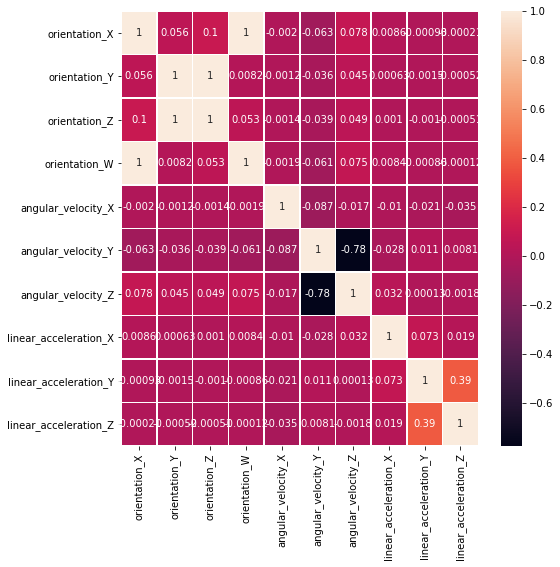

In [43]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x_test.iloc[:,3:].corr(), annot=True, linewidths=.5)

### Observation:
#### There is a strong correlation between:
- angular_velocity_Z and angular_velocity_Y
- orientation_X and orientation_Y
- orientation_Y and orientation_Z

## Feature Engineering: 


#### Merging x_train and y_train into a single data-frame


In [44]:
df = pd.merge(x_train,y_train,how='left',on='series_id')
df.sample()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
427725,3341_77,3341,77,-0.9848,0.082082,0.007407,-0.1529,0.09312,-0.01386,0.036761,-4.4419,3.9123,-14.938,71,tiled


In [45]:
df.drop(columns=["row_id","measurement_number","group_id"], inplace=True)
df.sample(2)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface
337671,2638,-0.95176,0.26741,0.034794,-0.146390,-0.028428,0.043255,-0.12134,-0.001412,1.2668,-9.8393,tiled
238244,1861,0.11640,0.98232,0.146260,0.009979,-0.022359,0.127030,-0.21537,-2.688400,3.5326,-19.4800,hard_tiles_large_space


In [46]:
just_check =  df.groupby("series_id").mean().reset_index()
df = pd.merge(just_check,y_train,how='left',on='series_id')
df.sample(3)

,series_id,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,group_id,surface
331,331,-0.388866,-0.908631,-0.144438,-0.048040,0.009423,0.011492,-0.028115,0.107944,2.788231,-9.415370,34,soft_pvc
69,69,0.800486,-0.580899,-0.082066,0.122626,0.004783,-0.013803,0.048954,0.332432,3.031714,-9.387068,3,soft_pvc
732,732,0.226724,0.961707,0.151068,0.029913,0.000041,0.002205,-0.000668,0.091480,2.940012,-9.350987,23,wood


In [47]:
df.drop(columns=["series_id","group_id"],inplace=True)

### Model Building:

### Splitting merged data frame into train and test splits:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(df[df.columns[:-1]])
train_x, test_x, train_y, test_y = train_test_split(train,df[df.columns[-1]],test_size = 0.1)

In [49]:
train_x.shape

(3429, 10)

#### Random Forest base model

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_x, train_y)
target = model.predict(test_x)
mat = confusion_matrix(test_y, target)
print("******confusion******\n",mat)

******confusion******
 [[11  3  0  0  0  0  1  3  3]
 [ 0 68  3  0  0  7  0  1  4]
 [ 0  2 24  0  0  0  0  0  2]
 [ 0  0  0  2  1  0  0  0  0]
 [ 1  2  1  0 23  1  1  1  2]
 [ 0  1  2  0  1 71  0  1  2]
 [ 0  6  1  0  1  4 21  1  0]
 [ 1  3  0  0  0  4  0 43  3]
 [ 0  5  3  0  1  2  1  2 34]]


In [51]:
x_test.drop(columns=["row_id","measurement_number"],inplace=True)
testing = x_test.groupby("series_id").mean().reset_index()
testing.sample(3)
testing.shape

(3816, 11)

In [52]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
fin_train = scale.fit_transform(df[df.columns[:-1]])
test = scale.transform(testing[testing.columns[1:]])

#### Final model:  XG boosted Classifier

In [53]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(fin_train,df[df.columns[-1]])
target = model.predict(test)

In [54]:
a = testing.series_id.tolist()
b = target
submission = pd.DataFrame({"series_id":a,"surface":b})

In [55]:
submission.surface.value_counts()

concrete                  1086
wood                       702
soft_pvc                   569
fine_concrete              378
tiled                      334
hard_tiles_large_space     312
soft_tiles                 268
carpet                     163
hard_tiles                   4
Name: surface, dtype: int64

In [56]:
submission.to_csv("submission_final.csv",index=False)

In [57]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score
from xgboost import XGBClassifier
for i in range(4,10):
    model = XGBClassifier(model_depth = i)
    model.fit(train_x, train_y)
    target = model.predict(test_x)
    print("accuracy : ", accuracy_score(target, test_y))
mat = confusion_matrix(test_y, target)
print("******confusion matrix******\n",mat)

[07:15:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { model_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy :  0.7926509186351706
[07:15:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { model_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy :  0.7926509186351706
[07:15:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { model_depth } might not be used.

  This may

#### Final accuracy of model : 0.79
This was my first cut solution to the problem . A more detailed solution will be updated here in the future.